# 1D Data Gaussian Approximator

## Import Modules

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import torch
import torch.optim as optim
import torch.nn as nn
from IPython import display

from scipy.stats import multivariate_normal

## Device Selection

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Data

In [ ]:
mean = 0
cov = 1
var = multivariate_normal(mean=mean, cov=cov)

X_train = np.linspace(-5,5, 2000)
y_train = var.pdf(X_train)

### Probability Density Function of Training Data

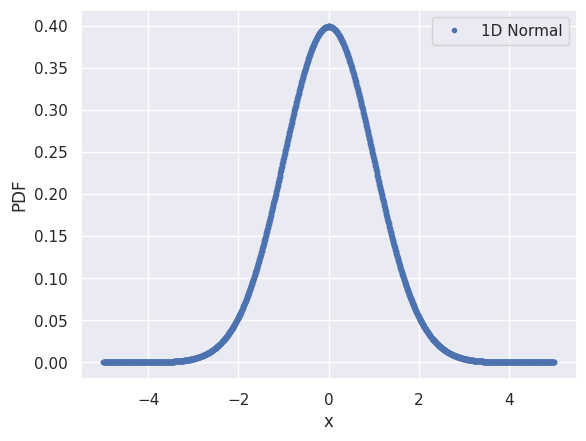

In [ ]:
plt.plot(X_train, y_train, '.', label = '1D Normal')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.show()

### Training Process with


*   More neurons in layers
*   More layers
*   HuberLoss function
*   Less learning rate
*   More epoch number






In [ ]:
X_train = X_train.reshape(len(X_train), -1)
x_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Decrease the learning rate from 0.01
learning_rate = 0.001

# Increase the number of neurons
model = nn.Sequential(
    nn.Linear(1, 12),
    nn.ReLU(),
    nn.Linear(12, 12),
    nn.ReLU(),
    nn.Linear(12,1)
)

model =model.to(device)

# Switch loss function with Huber Loss
criterion = nn.HuberLoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
n_epoch = 5000
Losses  = []

for t in range(n_epoch):
    y_pred = model(x_train_tensor)

    loss = criterion(y_pred.T, y_train_tensor)
    optimizer.zero_grad()

    print(f"[EPOCH]: {t}/{n_epoch}, [LOSS]: {loss.item():.6f}")
    if t % 100: Losses.append(loss.item())
    display.clear_output(wait=True)

    loss.backward()

    optimizer.step()

[EPOCH]: 4999/5000, [LOSS]: 0.000001


### Loss Graphics

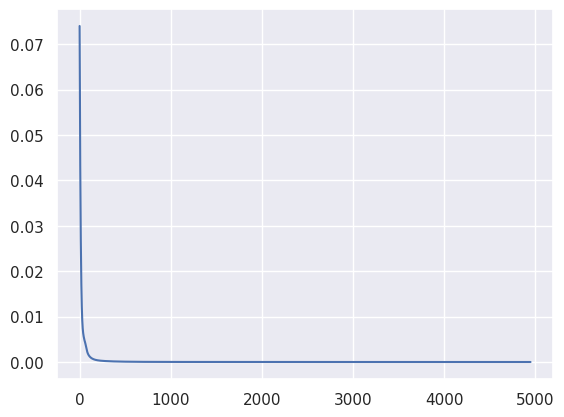

In [ ]:
plt.plot(Losses)

### Normal Distribution of Test Data and The Prediction

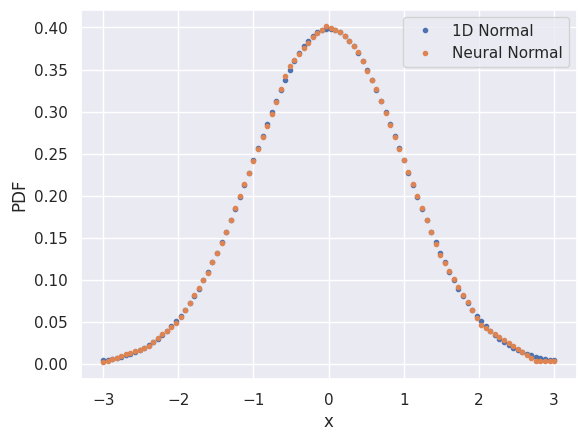

In [ ]:
x_test = np.linspace(-3,3, 100)
y_test = var.pdf(x_test)

x_test = x_test.reshape(len(x_test), -1)
x_test_tensor = torch.from_numpy(x_test).float().to(device)
y_pred = model(x_test_tensor)

y_pred = y_pred.flatten().cpu().detach().numpy()

plt.plot(x_test, y_test, '.', label = '1D Normal')
plt.plot(x_test, y_pred, '.', label = 'Neural Normal')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.show()

# 2D Approximator

## Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import torch
import torch.optim as optim
import torch.nn as nn
from IPython import display

from scipy.stats import multivariate_normal

### Training Data Creation

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])
var = multivariate_normal(mean=mean, cov=cov)

n_train_samples = 10000

x1, x2 = np.meshgrid(np.linspace(-3, 3, int(np.sqrt(n_train_samples))),
                     np.linspace(-3, 3, int(np.sqrt(n_train_samples))))
X_train = np.column_stack((x1.ravel(), x2.ravel()))
y_train = var.pdf(X_train)

## Training Process with


*   Much more neurons
*   More layers
*   Huber loss function



In [ ]:
X_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

learning_rate = 0.01

# Increase the number of neurons and layers
model = nn.Sequential(
    nn.Linear(2, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
).to(device)

# Switch the loss function to Huber Loss
criterion = nn.HuberLoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
n_epoch = 5000
Losses = []

for t in range(n_epoch):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred.T, y_train_tensor)
    optimizer.zero_grad()

    print(f"[EPOCH]: {t}/{n_epoch}, [LOSS]: {loss.item():.6f}")
    if t % 100 == 0:
        Losses.append(loss.item())
    display.clear_output(wait=True)

    loss.backward()
    optimizer.step()

[EPOCH]: 4999/5000, [LOSS]: 0.000000


## Loss Graphics

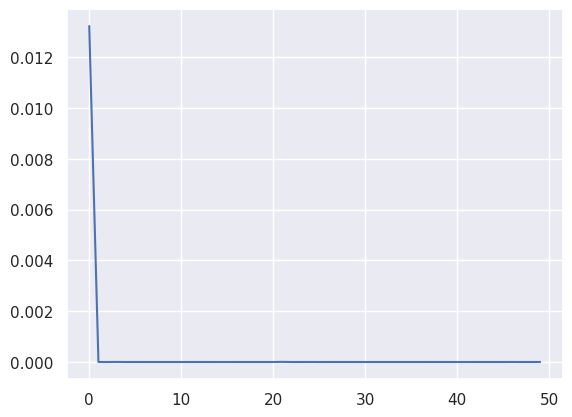

In [ ]:
plt.plot(Losses)

## Creating Test Data and Plotting PDF

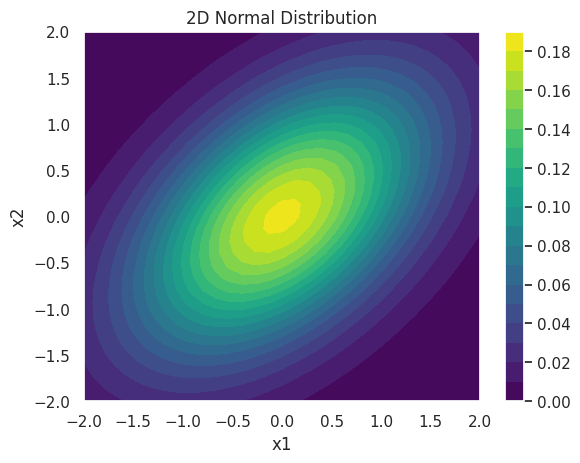

In [ ]:
n_test_samples = 1000

x1_test, x2_test = np.meshgrid(np.linspace(-2, 2, int(np.sqrt(n_test_samples))),
                               np.linspace(-2, 2, int(np.sqrt(n_test_samples))))
X_test = np.column_stack((x1_test.ravel(), x2_test.ravel()))
y_test = var.pdf(X_test)

plt.contourf(x1_test, x2_test, y_test.reshape(x1_test.shape), cmap='viridis', levels=20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.title('2D Normal Distribution')
plt.show()

X_test_tensor = torch.from_numpy(X_test).float().to(device)
y_test_tensor = torch.from_numpy(y_test).float().to(device)

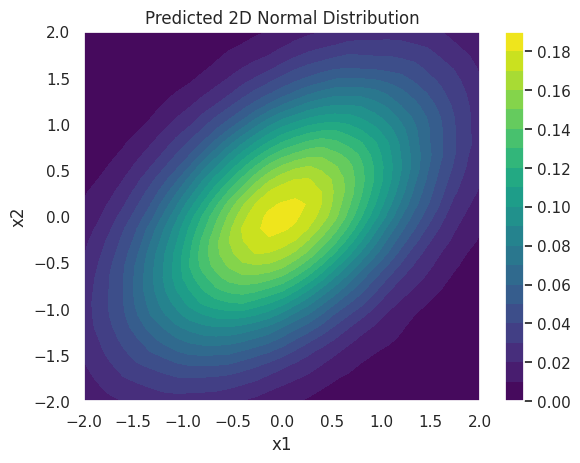

In [ ]:
y_test_pred = model(X_test_tensor).cpu().detach().numpy()

plt.contourf(x1_test, x2_test, y_test_pred.reshape(x1_test.shape), cmap='viridis', levels=20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.title('Predicted 2D Normal Distribution')
plt.show()